<a href="https://colab.research.google.com/github/AnaBeatrizMassuh/PLN_Final/blob/main/TrabalhoFinalPLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 BERT (Bidirectional Encoder Representations from Transformers)

In [2]:
import re
import pandas as pd
import numpy as np
import tensorflow

# Importando o dataset 

https://www.openml.org/search?type=data&status=active&id=43628
conjunto de dados usados


Separei o dataset em 75% para treino e 25% para teste

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/AnaBeatrizMassuh/TrabalhoFinalPLN/main/dataset_treinamento', header =None, sep =',', names = ['Category','ID','Status','nota', 'LinhaAerea','col1','user', 'col2','col3','Input','col4','hora','col5','lugar'], encoding='utf-8')
df_test = pd.read_csv('https://raw.githubusercontent.com/AnaBeatrizMassuh/TrabalhoFinalPLN/main/dataset_test', header = None, sep =',', names = ['Category','ID','Status','nota', 'LinhaAerea','col1','user', 'col2','col3','Input','col4','hora','col5','lugar'],encoding='utf-8')

In [4]:
df_train

,Category,ID,Status,nota,LinhaAerea,col1,user,col2,col3,Input,col4,hora,col5,lugar
570306133677760513,neutral,1.0000,?,?,'Virgin America',?,cairdin,?,0,'VirginAmerica What dhepburn said.',?,'2015-02-24 11:35:52 -0800',?,'Eastern Time (US Canada)'
570301130888122368,positive,0.3486,?,0.0,'Virgin America',?,jnardino,?,0,'VirginAmerica plus you\'ve added commercials ...,?,'2015-02-24 11:15:59 -0800',?,'Pacific Time (US Canada)'
570301083672813571,neutral,0.6837,?,?,'Virgin America',?,yvonnalynn,?,0,'VirginAmerica I didn\'t today... Must mean I ...,?,'2015-02-24 11:15:48 -0800','Lets Play','Central Time (US Canada)'
570301031407624196,negative,1.0000,'Bad Flight',0.7033,'Virgin America',?,jnardino,?,0,'VirginAmerica it\'s really aggressive to blas...,?,'2015-02-24 11:15:36 -0800',?,'Pacific Time (US Canada)'
570300817074462722,negative,1.0000,'Can\'t Tell',1.0,'Virgin America',?,jnardino,?,0,'VirginAmerica and it\'s a really big bad thin...,?,'2015-02-24 11:14:45 -0800',?,'Pacific Time (US Canada)'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568650058780041216,negative,1.0000,'Customer Service Issue',1.0,'US Airways',?,lj_verde,?,0,'USAirways never flying USAirways again. Horri...,terrible customer service.',?,'2015-02-19 21:55:13 -0800',DC
568646628795666432,neutral,0.7024,?,0.0,'US Airways',?,jmspool,?,0,'USAirways Mobile boarding pass email.',?,'2015-02-19 21:41:35 -0800','42.635976,-71.164046'
568644931792687104,positive,0.6987,?,?,'US Airways',?,katiesherwood,?,0,'USAirways we will...sunday! Just a few days a...,?,'2015-02-19 21:34:51 -0800','New York,New York'
568644286306242561,neutral,0.6401,?,?,'US Airways',?,jrfigo,?,0,'USAirways I am following you now',?,'2015-02-19 21:32:17 -0800',?,?


Tirar colunas irrelevantes

In [5]:
del df_train['ID']
del df_train['nota']
del df_train['Status']
del df_train['col1']
del df_train['LinhaAerea']
del df_train['user']
del df_train['col2']
del df_train['col3']
del df_train['col4']
del df_train['hora']
del df_train['col5']
del df_train['lugar']

df_train

,Category,Input
570306133677760513,neutral,'VirginAmerica What dhepburn said.'
570301130888122368,positive,'VirginAmerica plus you\'ve added commercials ...
570301083672813571,neutral,'VirginAmerica I didn\'t today... Must mean I ...
570301031407624196,negative,'VirginAmerica it\'s really aggressive to blas...
570300817074462722,negative,'VirginAmerica and it\'s a really big bad thin...
...,...,...
568650058780041216,negative,'USAirways never flying USAirways again. Horri...
568646628795666432,neutral,'USAirways Mobile boarding pass email.'
568644931792687104,positive,'USAirways we will...sunday! Just a few days a...
568644286306242561,neutral,'USAirways I am following you now'


In [6]:
del df_test['ID']
del df_test['nota']
del df_test['Status']
del df_test['col1']
del df_test['LinhaAerea']
del df_test['user']
del df_test['col2']
del df_test['col3']
del df_test['col4']
del df_test['hora']
del df_test['col5']
del df_test['lugar']

df_test

,Category,Input
568643981258723328,negative,'USAirways I have been on three planes for fli...
568641157724549120,negative,'USAirways Then told to offload because the ca...
568640966866935808,negative,'USAirways Why were we loaded onto the plane (...
568639824145584128,negative,'USAirways why load us on the flight if the ca...
568638903097421824,negative,'USAirways offloading the plane?!?!?! This is ...
...,...,...
569587686496825344,positive,'AmericanAir thank you we got on a different f...
569587371693355008,negative,'AmericanAir leaving over 20 minutes Late Flig...
569587242672398336,neutral,'AmericanAir Please bring American Airlines to...
569587188687634433,negative,'AmericanAir you have my money


#Convertando as colunas de classificações em dados categoricos


Mapeando as labels de sentimento com alguns números usando um dicionário e depois convertendo-os numa coluna categórica usando to_categorical.

In [7]:
encoded_dict = {'neutral':0, 'positive':1, 'negative':2}
df_train['Category'] = df_train.Category.map(encoded_dict)
df_test['Category'] = df_test.Category.map(encoded_dict)

Importanto to_categorical class para utils:

In [8]:
from tensorflow.keras.utils import to_categorical

Convertendo the integer coded Category column em categorical data(matrix)
Função to_categorical: Converts a class vector (integers) to binary class matrix.

In [9]:
y_train = to_categorical(df_train.Category)

In [10]:
y_test = to_categorical(df_test.Category)

# Importando o transformers Package

Instalando e importando o transformers package

In [11]:
!pip install transformers
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 16.1 MB/s 
     |████████████████████████████████| 120 kB 43.9 MB/s 
     |████████████████████████████████| 6.6 MB 44.5 MB/s 


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

#Falta fazer um pré processamento

#Carregando o modelo e fazendo a tokenização

In [13]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


#Input Data Modeling

Usando tokenizer do bert-base-cased

In [33]:
x_train = tokenizer(
    text=df_train.Input.tolist(),
    add_special_tokens=True,
    max_length=20,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=df_test.Input.tolist(),
    add_special_tokens=True,
    max_length=20,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [34]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [35]:
max_words = 30

hist = {}

hist['qtde'] = [x for x in range(0, max_words)]

lista = [0]*(max_words)
for x in x_train:
  lista[len(x)]+=1

hist['num hypothesis'] = lista

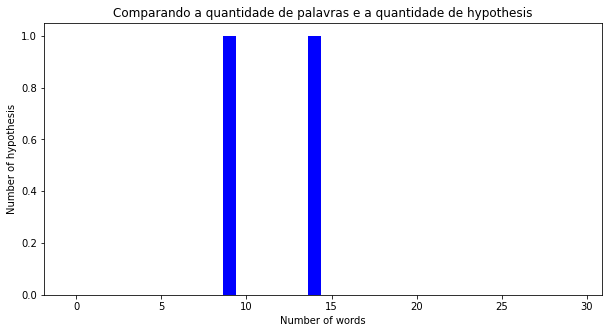

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(hist['qtde'],hist['num hypothesis'],
        color ='blue')
 
plt.xlabel("Number of words")
plt.ylabel("Number of hypothesis")
plt.title("Comparando a quantidade de palavras e a quantidade de hypothesis")
plt.show()

#Model Building

Importando bibliotecas

In [37]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, GlobalMaxPool1D, Dropout

Usando functional API para construir o modelo

In [38]:
max_len = 20
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(3,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

y = 3, pois podem ter 3 possiveis respostas

#Compilando o modelo

Learning parameters


In [39]:
optimizer = Adam(
    learning_rate=5e-05, #learning ratebert model ,huggingface site 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# loss and metrics
loss = CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),
# Compilando o modelo
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)


#Treinando o modelo

did you forget to provide a `loss`argument?

In [40]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test
    ),
  epochs=2,
    batch_size=36
)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


305/305 [==============================] - 2656s 9s/step - loss: 0.6478 - balanced_accuracy: 0.7334 - val_loss: 0.5509 - val_balanced_accuracy: 0.7757
Epoch 2/2
305/305 [==============================] - 2635s 9s/step - loss: 0.4648 - balanced_accuracy: 0.8194 - val_loss: 0.5144 - val_balanced_accuracy: 0.8047


#Avaliando resultados

Testando o modelo

In [41]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

array([0.69709337, 0.13328904, 0.94057673], dtype=float32)

Taking the index of value having maximum probability

In [42]:
y_predicted = np.argmax(predicted_raw, axis = 1)
y_true = df_test.Category

#Resultados

In [43]:
from sklearn.metrics import classification_report

In [44]:
classification_report(y_true, y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.55      0.60      0.58       577\n           1       0.69      0.68      0.69       456\n           2       0.89      0.87      0.88      2628\n\n    accuracy                           0.80      3661\n   macro avg       0.71      0.72      0.71      3661\nweighted avg       0.81      0.80      0.81      3661\n'

In [46]:
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.55      0.60      0.58       577
           1       0.69      0.68      0.69       456
           2       0.89      0.87      0.88      2628

    accuracy                           0.80      3661
   macro avg       0.71      0.72      0.71      3661
weighted avg       0.81      0.80      0.81      3661

